## Visualization and Comparison Notebook for Analyses of Lick Metric Data

*  First part of notebook shows how to use functions for session level comparisons and analyses

In [1]:
from tfcrig import stats
import pandas as pd
from tfcrig.google_drive import GoogleDrive


In [21]:
# load data 
metadata_loc = r'G:\Shared drives\Turi_lab\Data\aging_project\metadata.gsheet'
data_loc = r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\lick_results_subset\cohort8_post_learning_d1.csv"
csv_url = f"https://docs.google.com/spreadsheets/d/1KPs7heuAgJhSsPFOhgvtFXSeeoB55ugBdX5xkxYY4I0/gviz/tq?tqx=out:csv"

df = pd.read_csv(data_loc)
metadata_df = pd.read_csv(csv_url)
session_df = stats.Session(
    df, 
    metadata_df, 
    # trial_filter=range(11,25)
)

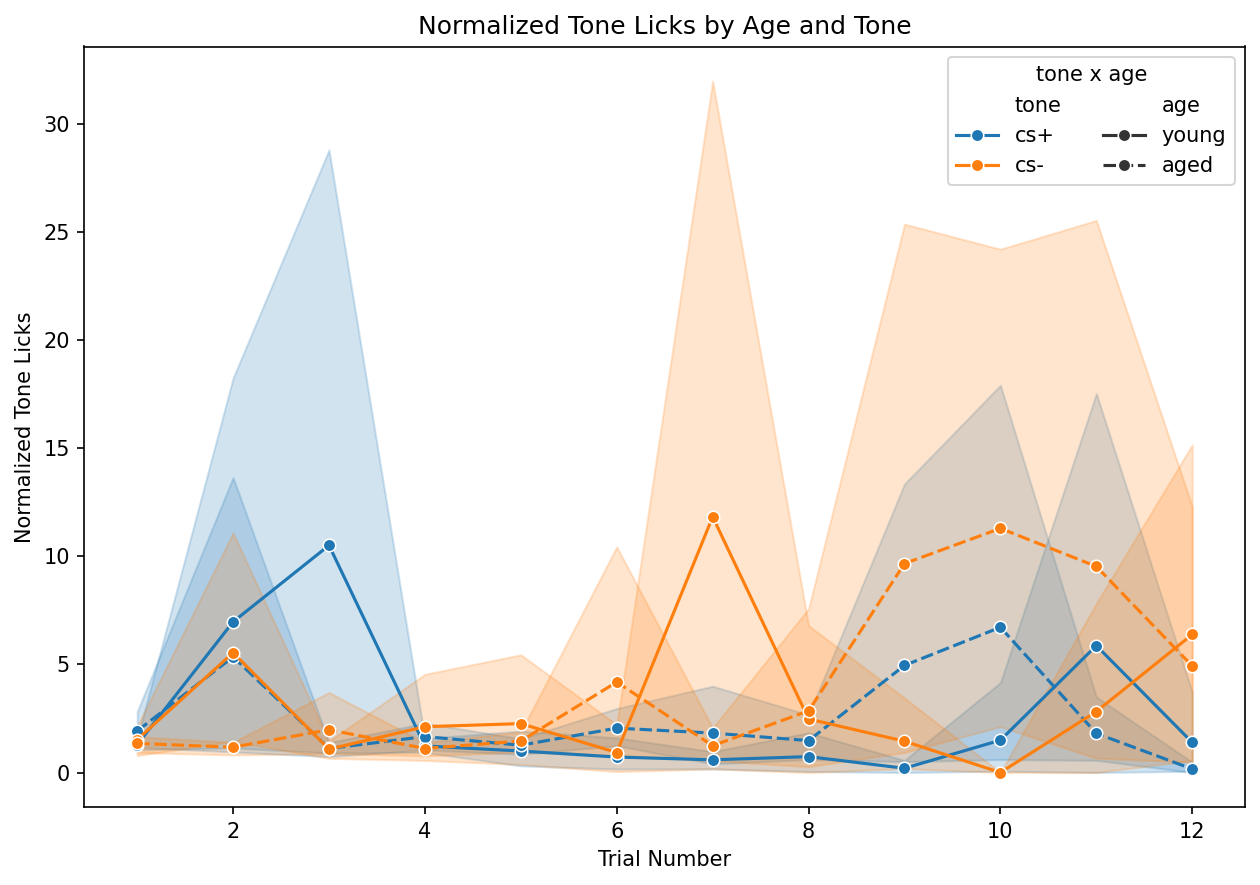

In [5]:
session_df.plot_lick_metrics_remapped_trial_number(
    y_metric="norm_tone_licks",
    hue="tone",
    style="age",
    ylabel="Normalized Tone Licks",
    title="Normalized Tone Licks by Age and Tone",
)

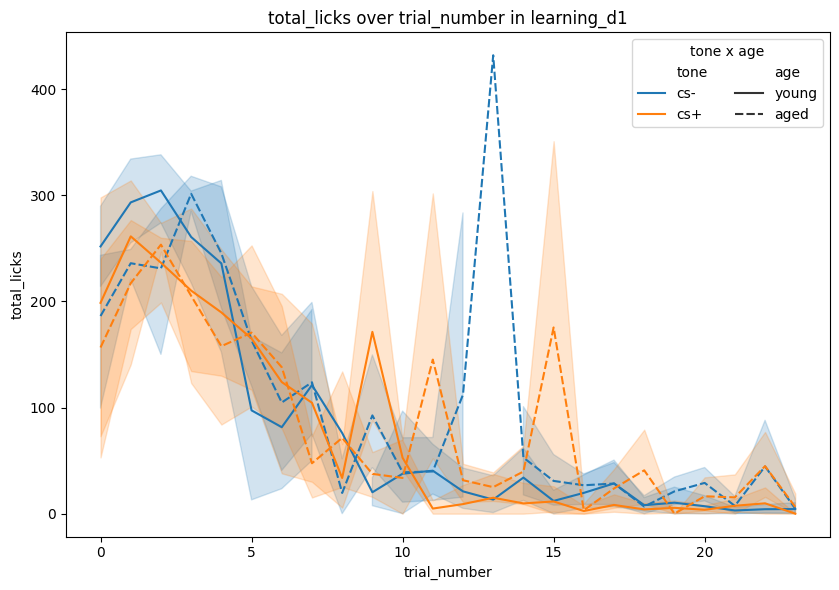

In [115]:
# plot metrics for entire session and entire cohort across trials

session_df.plot_cohort_across_trials(
    # x = 'trial_number',
    y = 'total_licks',
    # hue = 'tone',
    # style = 'age',
)

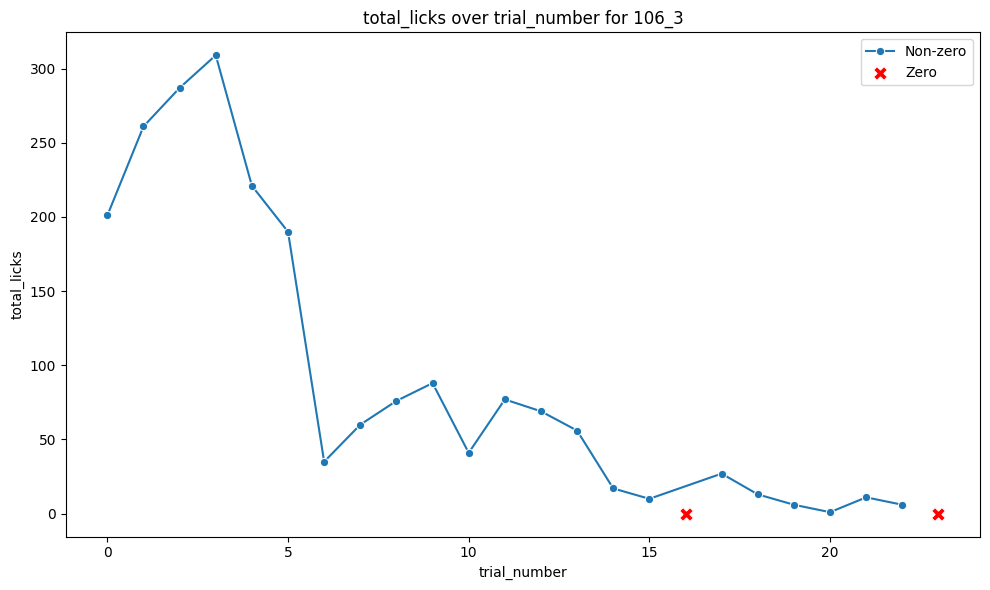

Trials with total_licks == 0 for 106_3: [16, 23]
    trial_number  total_licks
16            16            0
23            23            0


In [116]:
# plotting session data for a single mouse over trials 

session_df.plot_mouse_total_licks_across_trials(
    mouse_id='106_3',        # mouse id to plot
    # y = 'total_licks',     # default
    # x = 'trial_number',    # default
    # title=None,            # default
    # ylabel=None,           # default
    # xlabel=None,           # default
    # figsize=(10, 6)        # default
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\

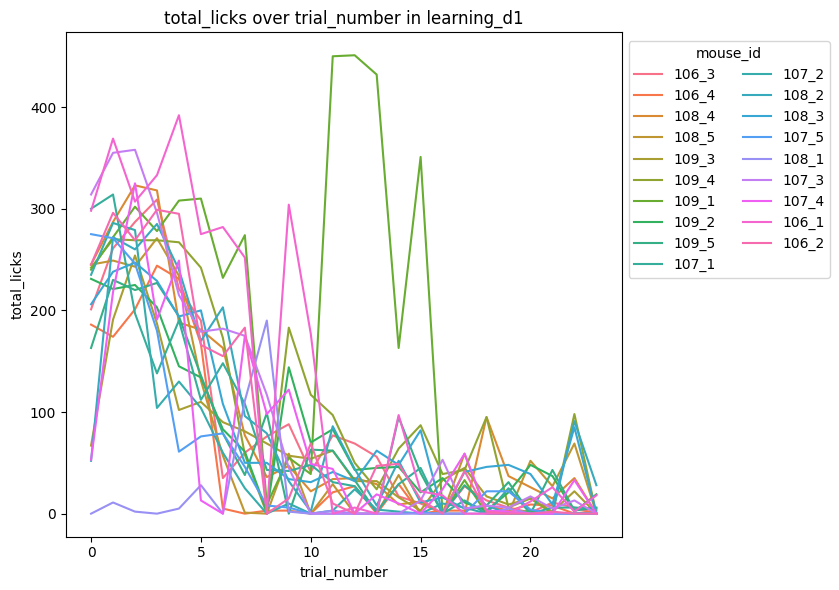

In [118]:
# plotting session data over trials 

session_df.plot_all_mice_metrics_over_trials(
    y='total_licks',
    # x='trial_number',         # default
    # hue='mouse_id',           # default
    # title=None,               # default
    # ylabel=None,              # defaults to y
    # figsize=(10, 5)           # default size
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWar

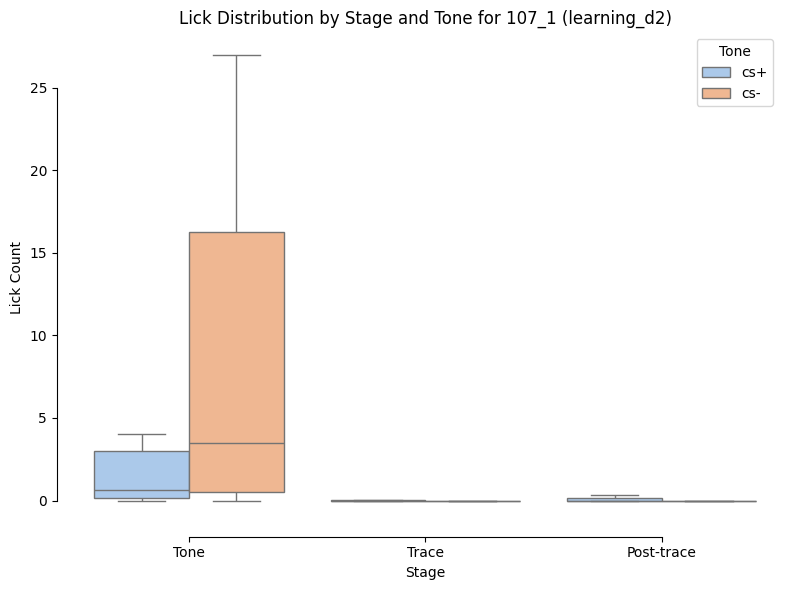

In [91]:
session_df.plot_stage_boxplot_for_single_mouse(
    "107_1", 
    stage_cols={
        # "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",
        "Post-trace": "norm_post_trace_licks",
    },
    hue="tone",
    hue_order=["cs+", "cs-"], 
    palette={"cs+": "#A1C9F4", "cs-": "#FFB482"}
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWar

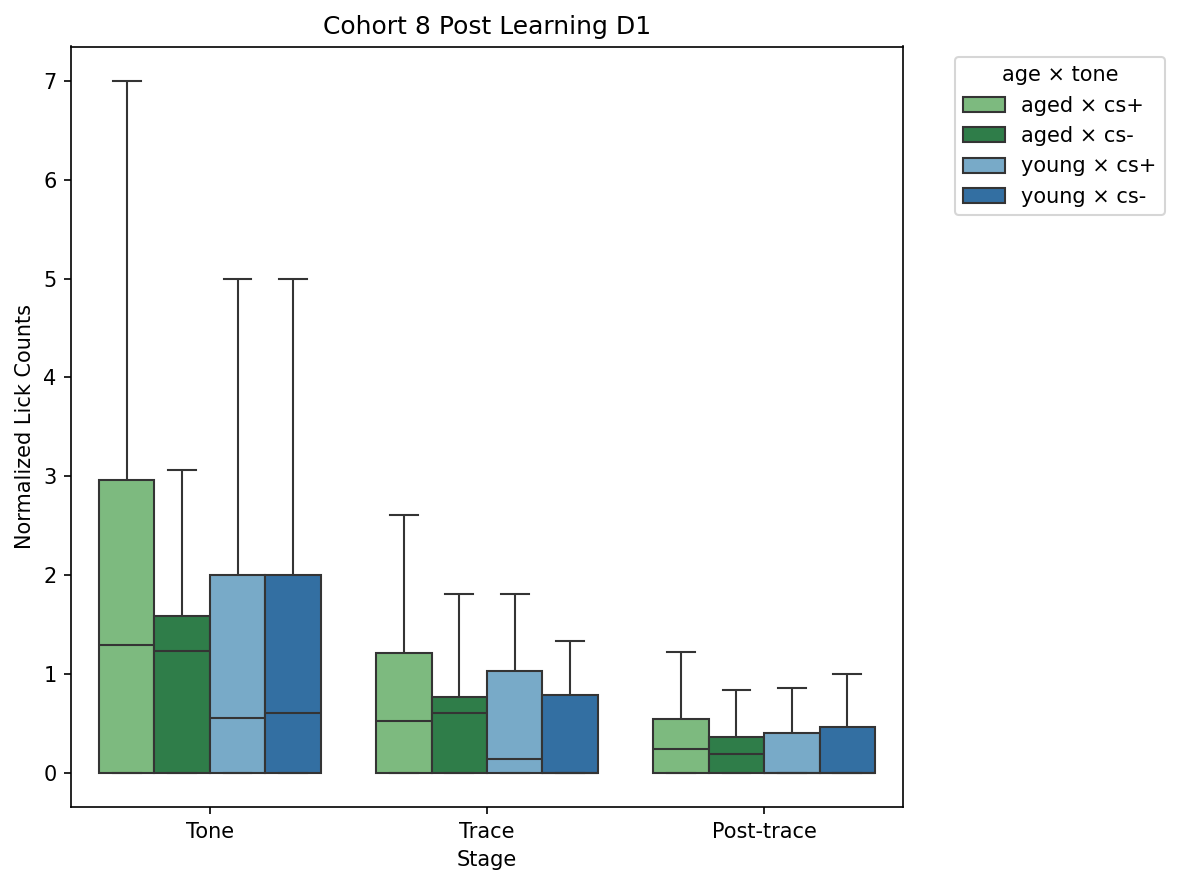

In [23]:
session_df.plot_stage_boxplot_by_group(
    group_vars=["age", "tone"],
    stage_cols={            
        # "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",            
        "Post-trace": "norm_post_trace_licks",
        },
    title="Cohort 8 Post Learning D1",
    ylabel="Normalized Lick Counts",
)


In [30]:
session_df.wilcoxon_test_for_condition(
    condition="tone",
    filter_group="age",
    select_group="young",
    testing_metrics="norm_post_trace_licks",
)

Wilcoxon test between cs+ and cs- among young mice:
Statistic: 409.0, p-value: 0.7805347281714636


In [ ]:
session_df.mann_whitney_test_for_age(
    condition="age",
    filter_group="tone",
    select_group="cs+",
    testing_metrics="norm_post_trace_licks",
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWar

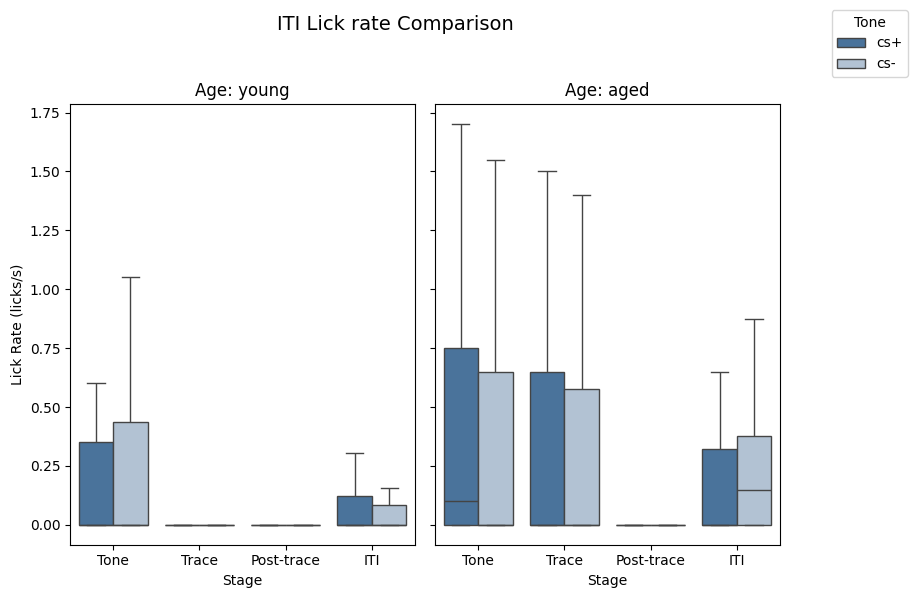

In [95]:
session_df.iti_comparison(
    stage_cols={
        "Tone": "tone_lick_rate",
        "Trace": "trace_lick_rate",
        "Post-trace": "post_trace_lick_rate",
        "ITI": "iti_lick_rate",
    },
    group_vars="age",
    figsize=(8,6),
    title="ITI Lick rate Comparison",
    ylabel="Lick Rate (licks/s)",
)

In [96]:
session_df.iti_test(
    compare_cols=[
        "tone_lick_rate",
        "trace_lick_rate",
        "post_trace_lick_rate",
    ],
    iti_col="iti_lick_rate",
    filter_group=["age", "tone"],
    select_group=["young", "cs-"],
)

Comparison: tone_lick_rate vs iti_lick_rate (group = ['young', 'cs-'])
Statistic: 1781.000, p-value: 0.02129

Comparison: trace_lick_rate vs iti_lick_rate (group = ['young', 'cs-'])
Statistic: 1314.000, p-value: 0.27220

Comparison: post_trace_lick_rate vs iti_lick_rate (group = ['young', 'cs-'])
Statistic: 1264.000, p-value: 0.12195



c:\users\chehaoy\onedrive - new york state office of information technology services\documents\aging project\tfc-rig\analysis\tfcrig\stats.py:422: RuntimeWarning: divide by zero encountered in divide
  ratio = trial_rates / iti_rates
c:\users\chehaoy\onedrive - new york state office of information technology services\documents\aging project\tfc-rig\analysis\tfcrig\stats.py:422: RuntimeWarning: invalid value encountered in divide
  ratio = trial_rates / iti_rates
c:\users\chehaoy\onedrive - new york state office of information technology services\documents\aging project\tfc-rig\analysis\tfcrig\stats.py:422: RuntimeWarning: divide by zero encountered in divide
  ratio = trial_rates / iti_rates
c:\users\chehaoy\onedrive - new york state office of information technology services\documents\aging project\tfc-rig\analysis\tfcrig\stats.py:422: RuntimeWarning: invalid value encountered in divide
  ratio = trial_rates / iti_rates
c:\users\chehaoy\onedrive - new york state office of information t

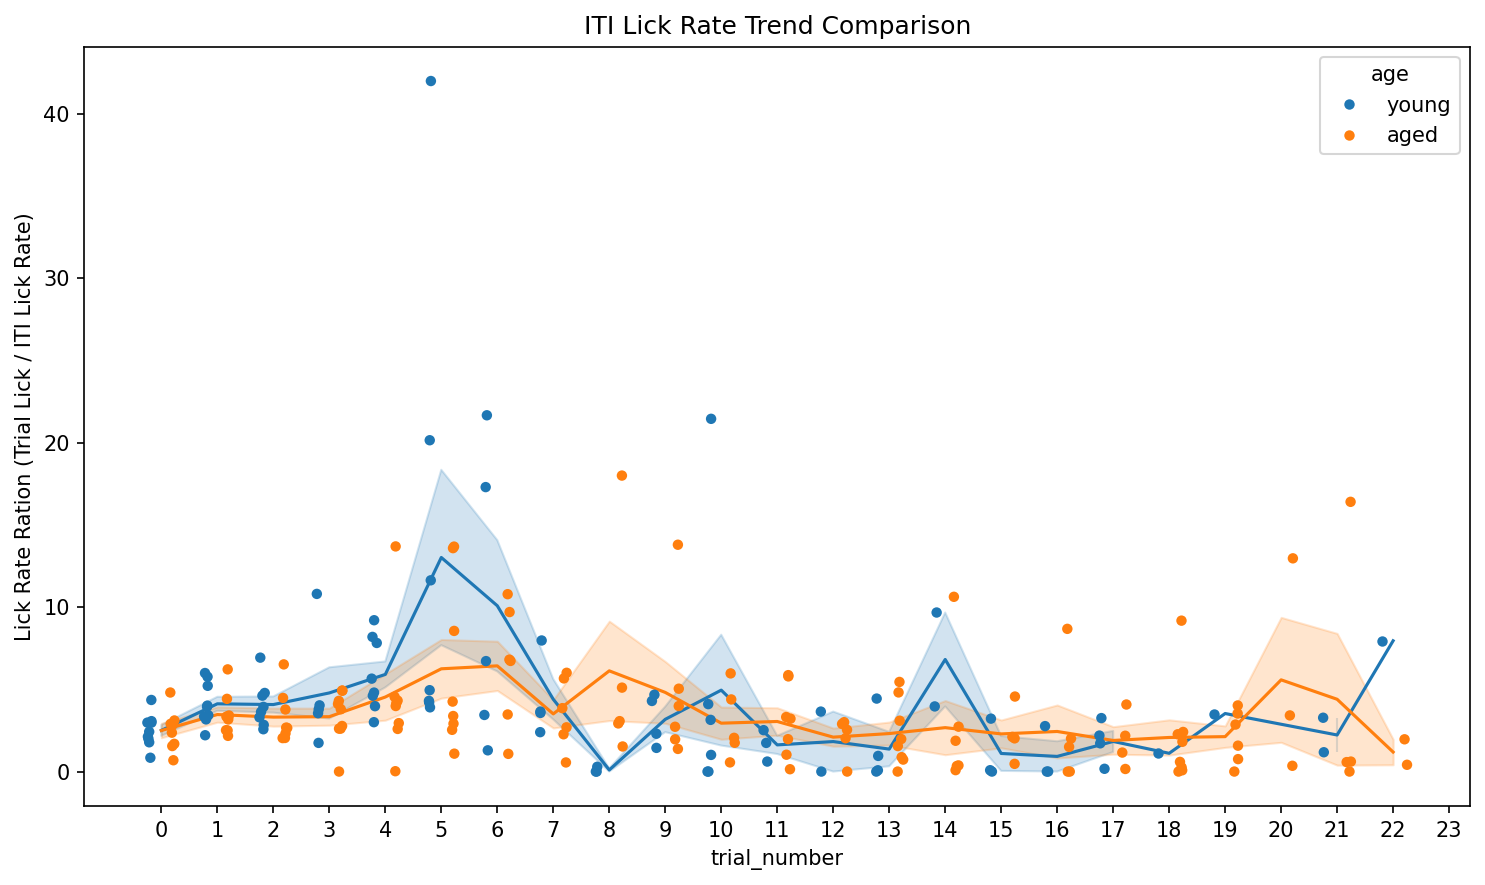

In [3]:
session_df.iti_trend_comparison(
    hue="age",
    hue_order=["young", "aged"],
    figsize=(10, 6),
    title="ITI Lick Rate Trend Comparison",
    ylabel="Lick Rate Ration (Trial Lick / ITI Lick Rate)"
)

*  Second part of this notebook shows cohort-level comparison functions

In [1]:
# use 
from tfcrig.helpers.batch import load_sessions_from_folder
from tfcrig import stats
import pandas as pd

folder_path = r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\lick_results_subset"
folder_data = load_sessions_from_folder(folder_path)

csv_url = f"https://docs.google.com/spreadsheets/d/1KPs7heuAgJhSsPFOhgvtFXSeeoB55ugBdX5xkxYY4I0/gviz/tq?tqx=out:csv"
metadata_df = pd.read_csv(csv_url)
cohort_df = stats.Cohort(folder_data, metadata_df)

In [2]:
# realign trial number: such that trial 0 in the second session will be trial x + 1, where x is the last trial number of the first session

cohort_df.realign_trials_by_session_order([
    "lick_training", "pre_learning", "learning", "post_learning"
])


In [20]:
reward_success_rate = cohort_df.compute_reward_success_rate(
    groupby_cols=['mouse_id', 'session_id', 'tone', 'airpuff'],
    reward_col="post_trace_licks"
)
reward_success_rate

,mouse_id,session_id,tone,airpuff,post_trace_licks_success_rate
0,114_1,learning_d11,cs+,puff,75.000000
1,114_1,learning_d11,cs-,no_puff,41.666667
2,114_1,post_learning_d1,cs+,no_puff,25.000000
3,114_1,post_learning_d1,cs-,no_puff,16.666667
4,114_1,pre_learning_d21,cs+,no_puff,16.666667
...,...,...,...,...,...
85,117_5,learning_d11,cs-,no_puff,66.666667
86,117_5,post_learning_d1,cs+,no_puff,41.666667
87,117_5,post_learning_d1,cs-,no_puff,33.333333
88,117_5,pre_learning_d21,cs+,no_puff,33.333333


In [4]:
# reward_success_rate.to_csv( r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\reward_success_rate_new_56.csv", index=False)

In [22]:
# cohort_df.plot_reward_success_rate_by_age_split()


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\

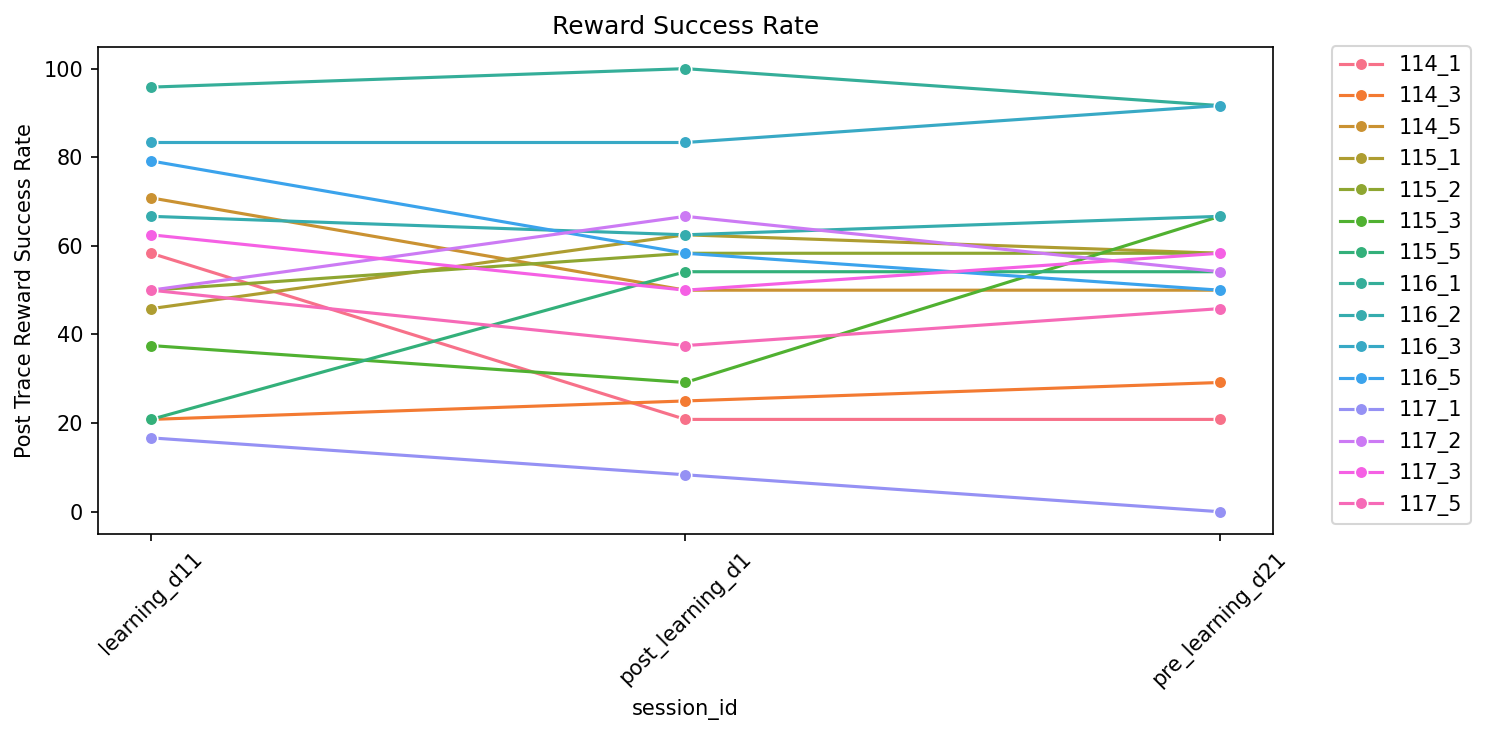

In [23]:
cohort_df.plot_reward_success_rate(
    reward_col="post_trace_licks",
    groupby_cols=["mouse_id", "session_id"],
    hue='mouse_id',
    title="Reward Success Rate",
    ylabel="Post Trace Reward Success Rate",
    figsize=(10, 5),
)


In [7]:
cohort_df.count_above_below_mean_by_group(
    reward_col="post_trace_licks",
    groupby_cols=["mouse_id", "session_id"],
    group_var="age",
)

,session_id,age,count_above,count_below
0,pre_learning_d10,aged,4,4
1,pre_learning_d10,young,3,4
2,pre_learning_d11,aged,4,4
3,pre_learning_d11,young,2,5
4,pre_learning_d12,aged,3,3
5,pre_learning_d12,young,4,3
6,pre_learning_d13,aged,6,2
7,pre_learning_d13,young,4,3
8,pre_learning_d14,aged,6,2
9,pre_learning_d14,young,4,3


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\

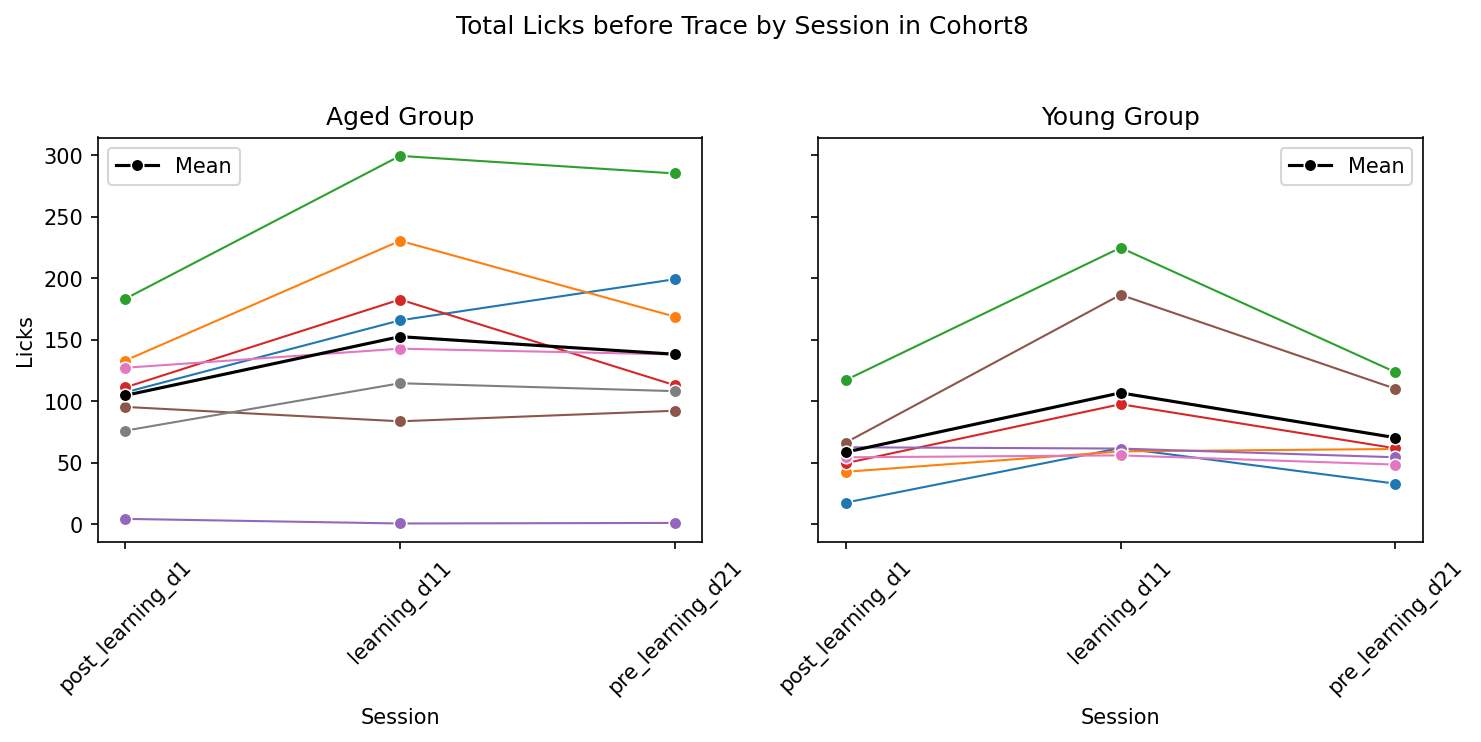

In [25]:
cohort_df.plot_metric_by_reindexed_trial_split(
    y_metric="pre_post_trace_licks",
    groupby_cols=["mouse_id", "session_id"],
    group_var="age",
    figsize=(10, 5),
    title="Total Licks before Trace by Session in Cohort8",
    ylabel="Licks"
)

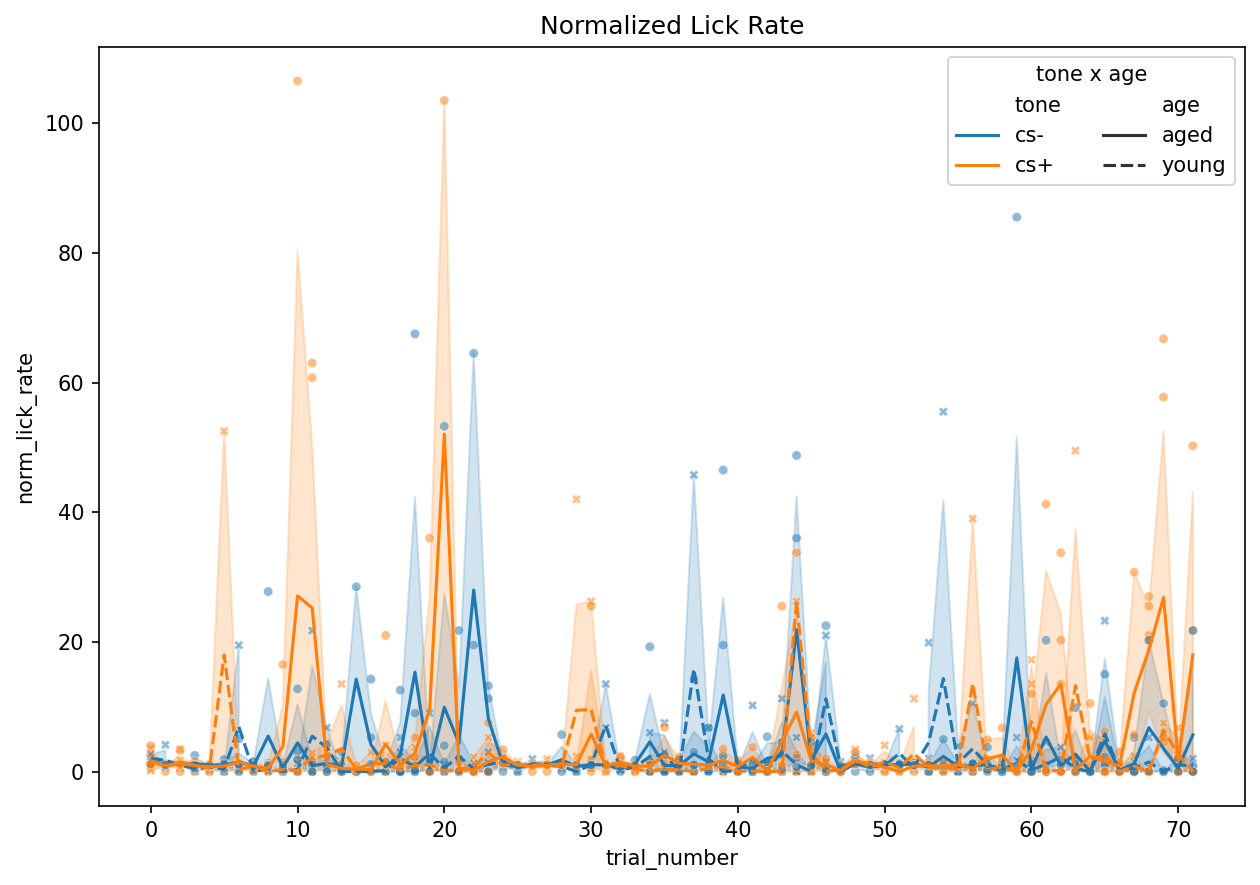

In [5]:
cohort_df.plot_norm_lick_rate_by_reindexed_trial(
    x='trial_number',
    y='norm_lick_rate',
    hue='tone',
    style='age',
    title="Normalized Lick Rate",
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\

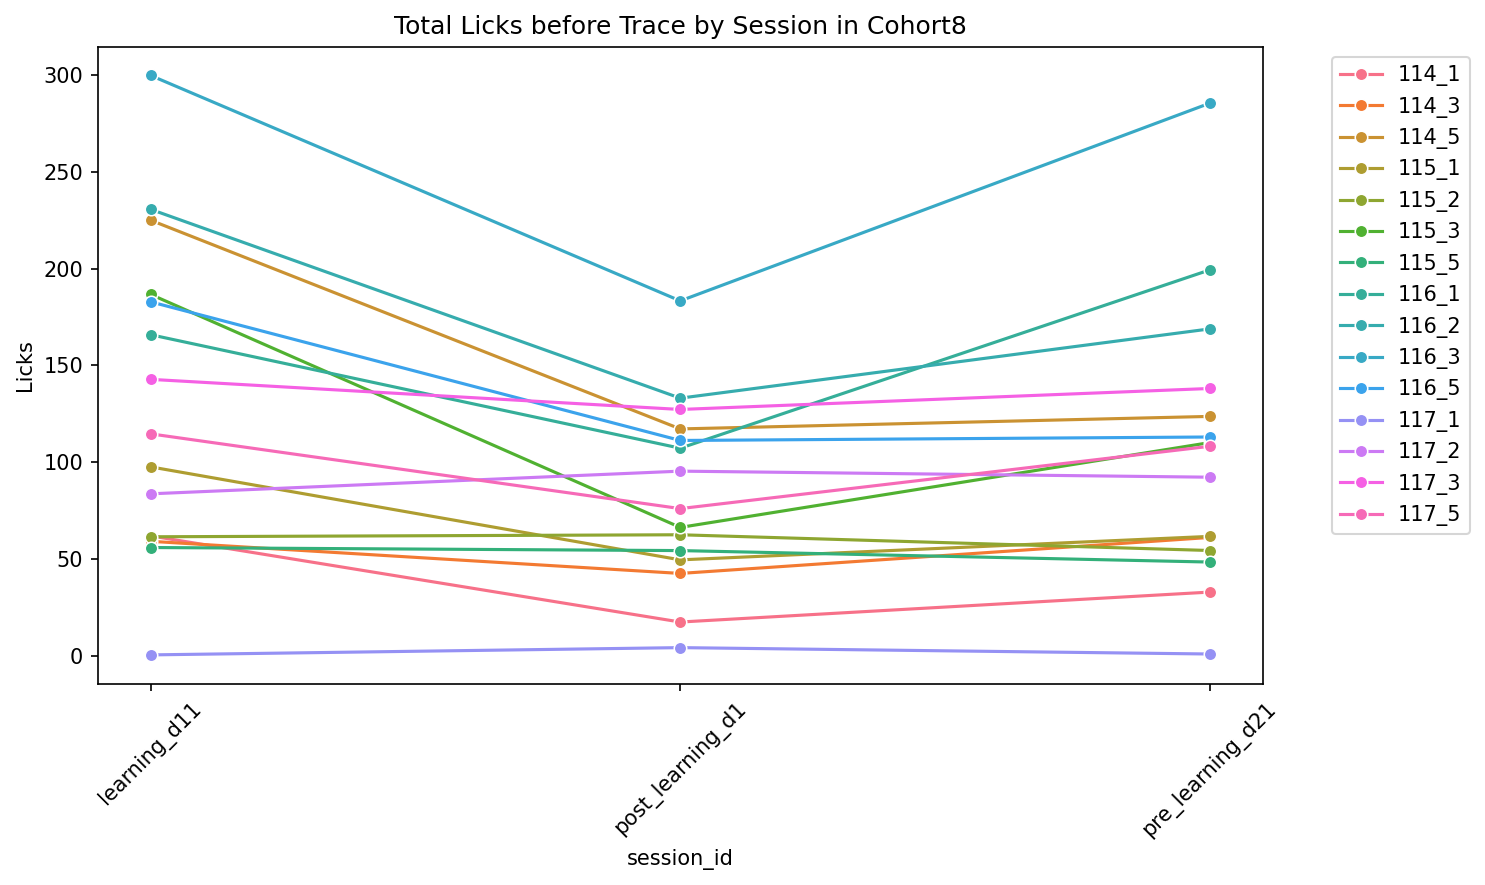

In [5]:
cohort_df.plot_metric_by_reindexed_trial(
    y_metric="pre_post_trace_licks",
    # session_order=["lick_training", "pre_learning", "learning", "post_learning"],
    groupby_cols=["mouse_id", "session_id"],
    hue="mouse_id",
    title="Total Licks before Trace by Session in Cohort8",
    ylabel="Licks",
    figsize=(10, 6)
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\

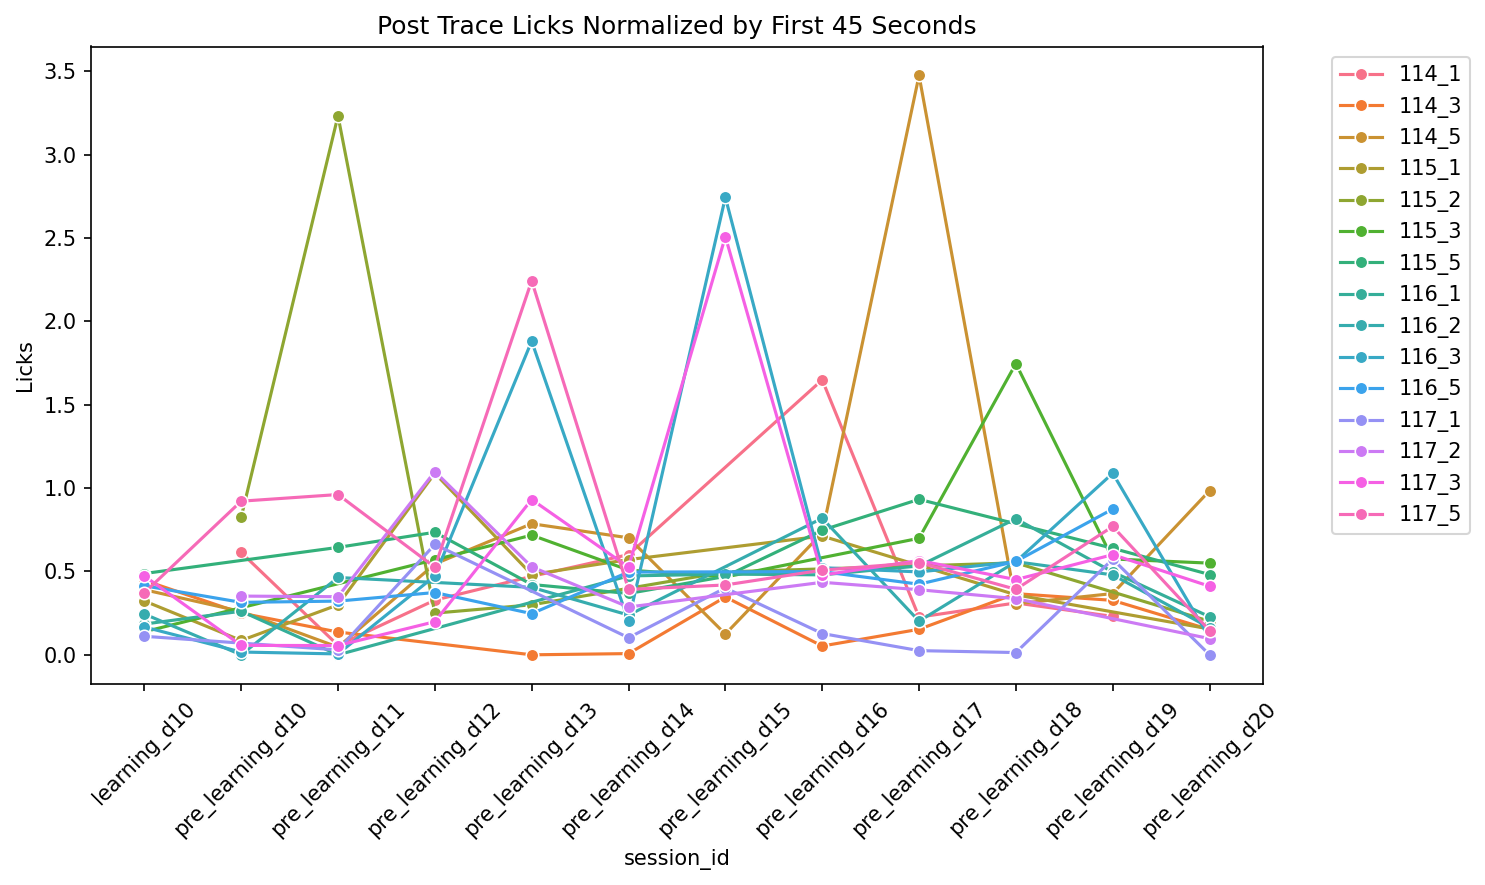

In [5]:
cohort_df.plot_metric_by_reindexed_trial(
    y_metric="new_norm_post_trace_licks",
    hue="mouse_id",
    title="Post Trace Licks Normalized by First 45 Seconds",
    ylabel="Licks",
    figsize=(10, 6)
)

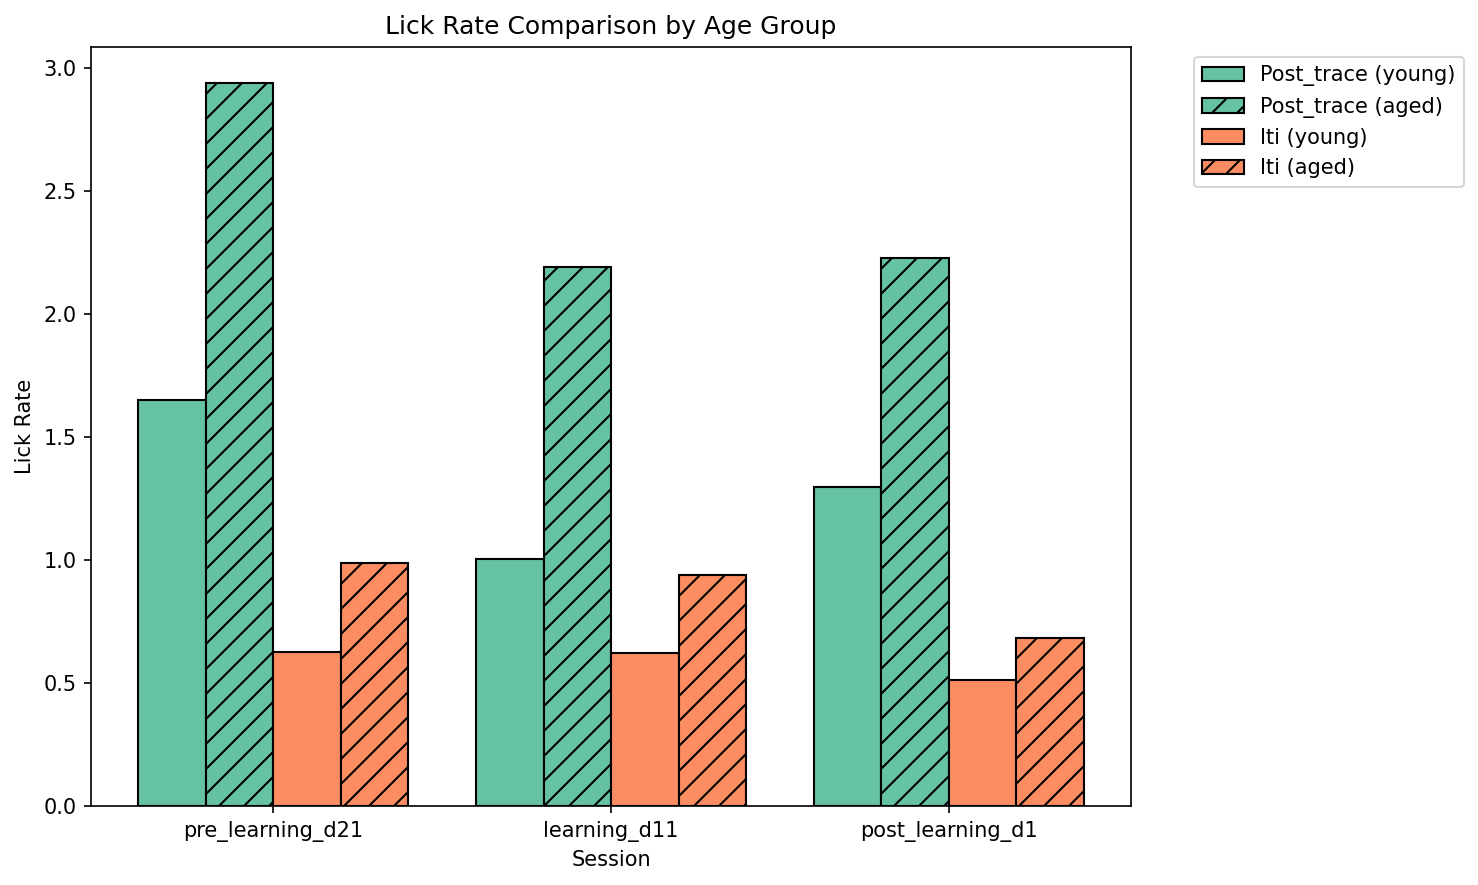

In [3]:
cohort_df.plot_lick_rate_comparison_by_age(
    session_ids=['pre_learning_d21', 'learning_d11', 'post_learning_d1'],
    lick_rate_cols=['post_trace_lick_rate', 'iti_lick_rate'],
    age_col='age',
    session_col='session_id',
    figsize=(10, 6)
)

In [3]:
cohort_df.wilcoxon_lick_vs_iti(
    testing_metric="post_trace_lick_rate",
    filter_group="age",
    select_group="aged",
    session_ids=['pre_learning_d21'],
    session_col='session_id',
)

Wilcoxon test between post_trace_lick_rate and ITI lick rate (group: aged)
Statistic: 1.000, p-value: 0.01562


In [1]:
from tfcrig import stats
import pandas as pd

csv_paths = [
    r"G:\Shared drives\Turi_lab\Data\aging_project\VI_98(125)_100(123)_102(1235)_103(125)\cohort_vi_lick_results\cohort6_learning_d1.csv",
    r"G:\Shared drives\Turi_lab\Data\aging_project\VII_106(1234)_107(12345)_108(12345)_109(12345)\cohort_vii_lick_results\cohort7_learning_d1.csv",
    r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\lick_results_subset\cohort8_learning_d11.csv"
]

csv_url = f"https://docs.google.com/spreadsheets/d/1KPs7heuAgJhSsPFOhgvtFXSeeoB55ugBdX5xkxYY4I0/gviz/tq?tqx=out:csv"
metadata_df = pd.read_csv(csv_url)

multiCohort = stats.MultiCohort(csv_paths, metadata_df=metadata_df)

Processing: cohort6_learning_d1.csv
cohort6_learning_d1.csv → after merge: (288, 33)
Processing: cohort7_learning_d1.csv
cohort7_learning_d1.csv → after merge: (456, 36)
Processing: cohort8_learning_d11.csv
cohort8_learning_d11.csv → after merge: (360, 36)


In [32]:
print(multiCohort.cohorts)
print(multiCohort.which_days)

['cohort6', 'cohort7', 'cohort8']
{'cohort6': ['learning_d1'], 'cohort7': ['learning_d1'], 'cohort8': ['learning_d11']}


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWar

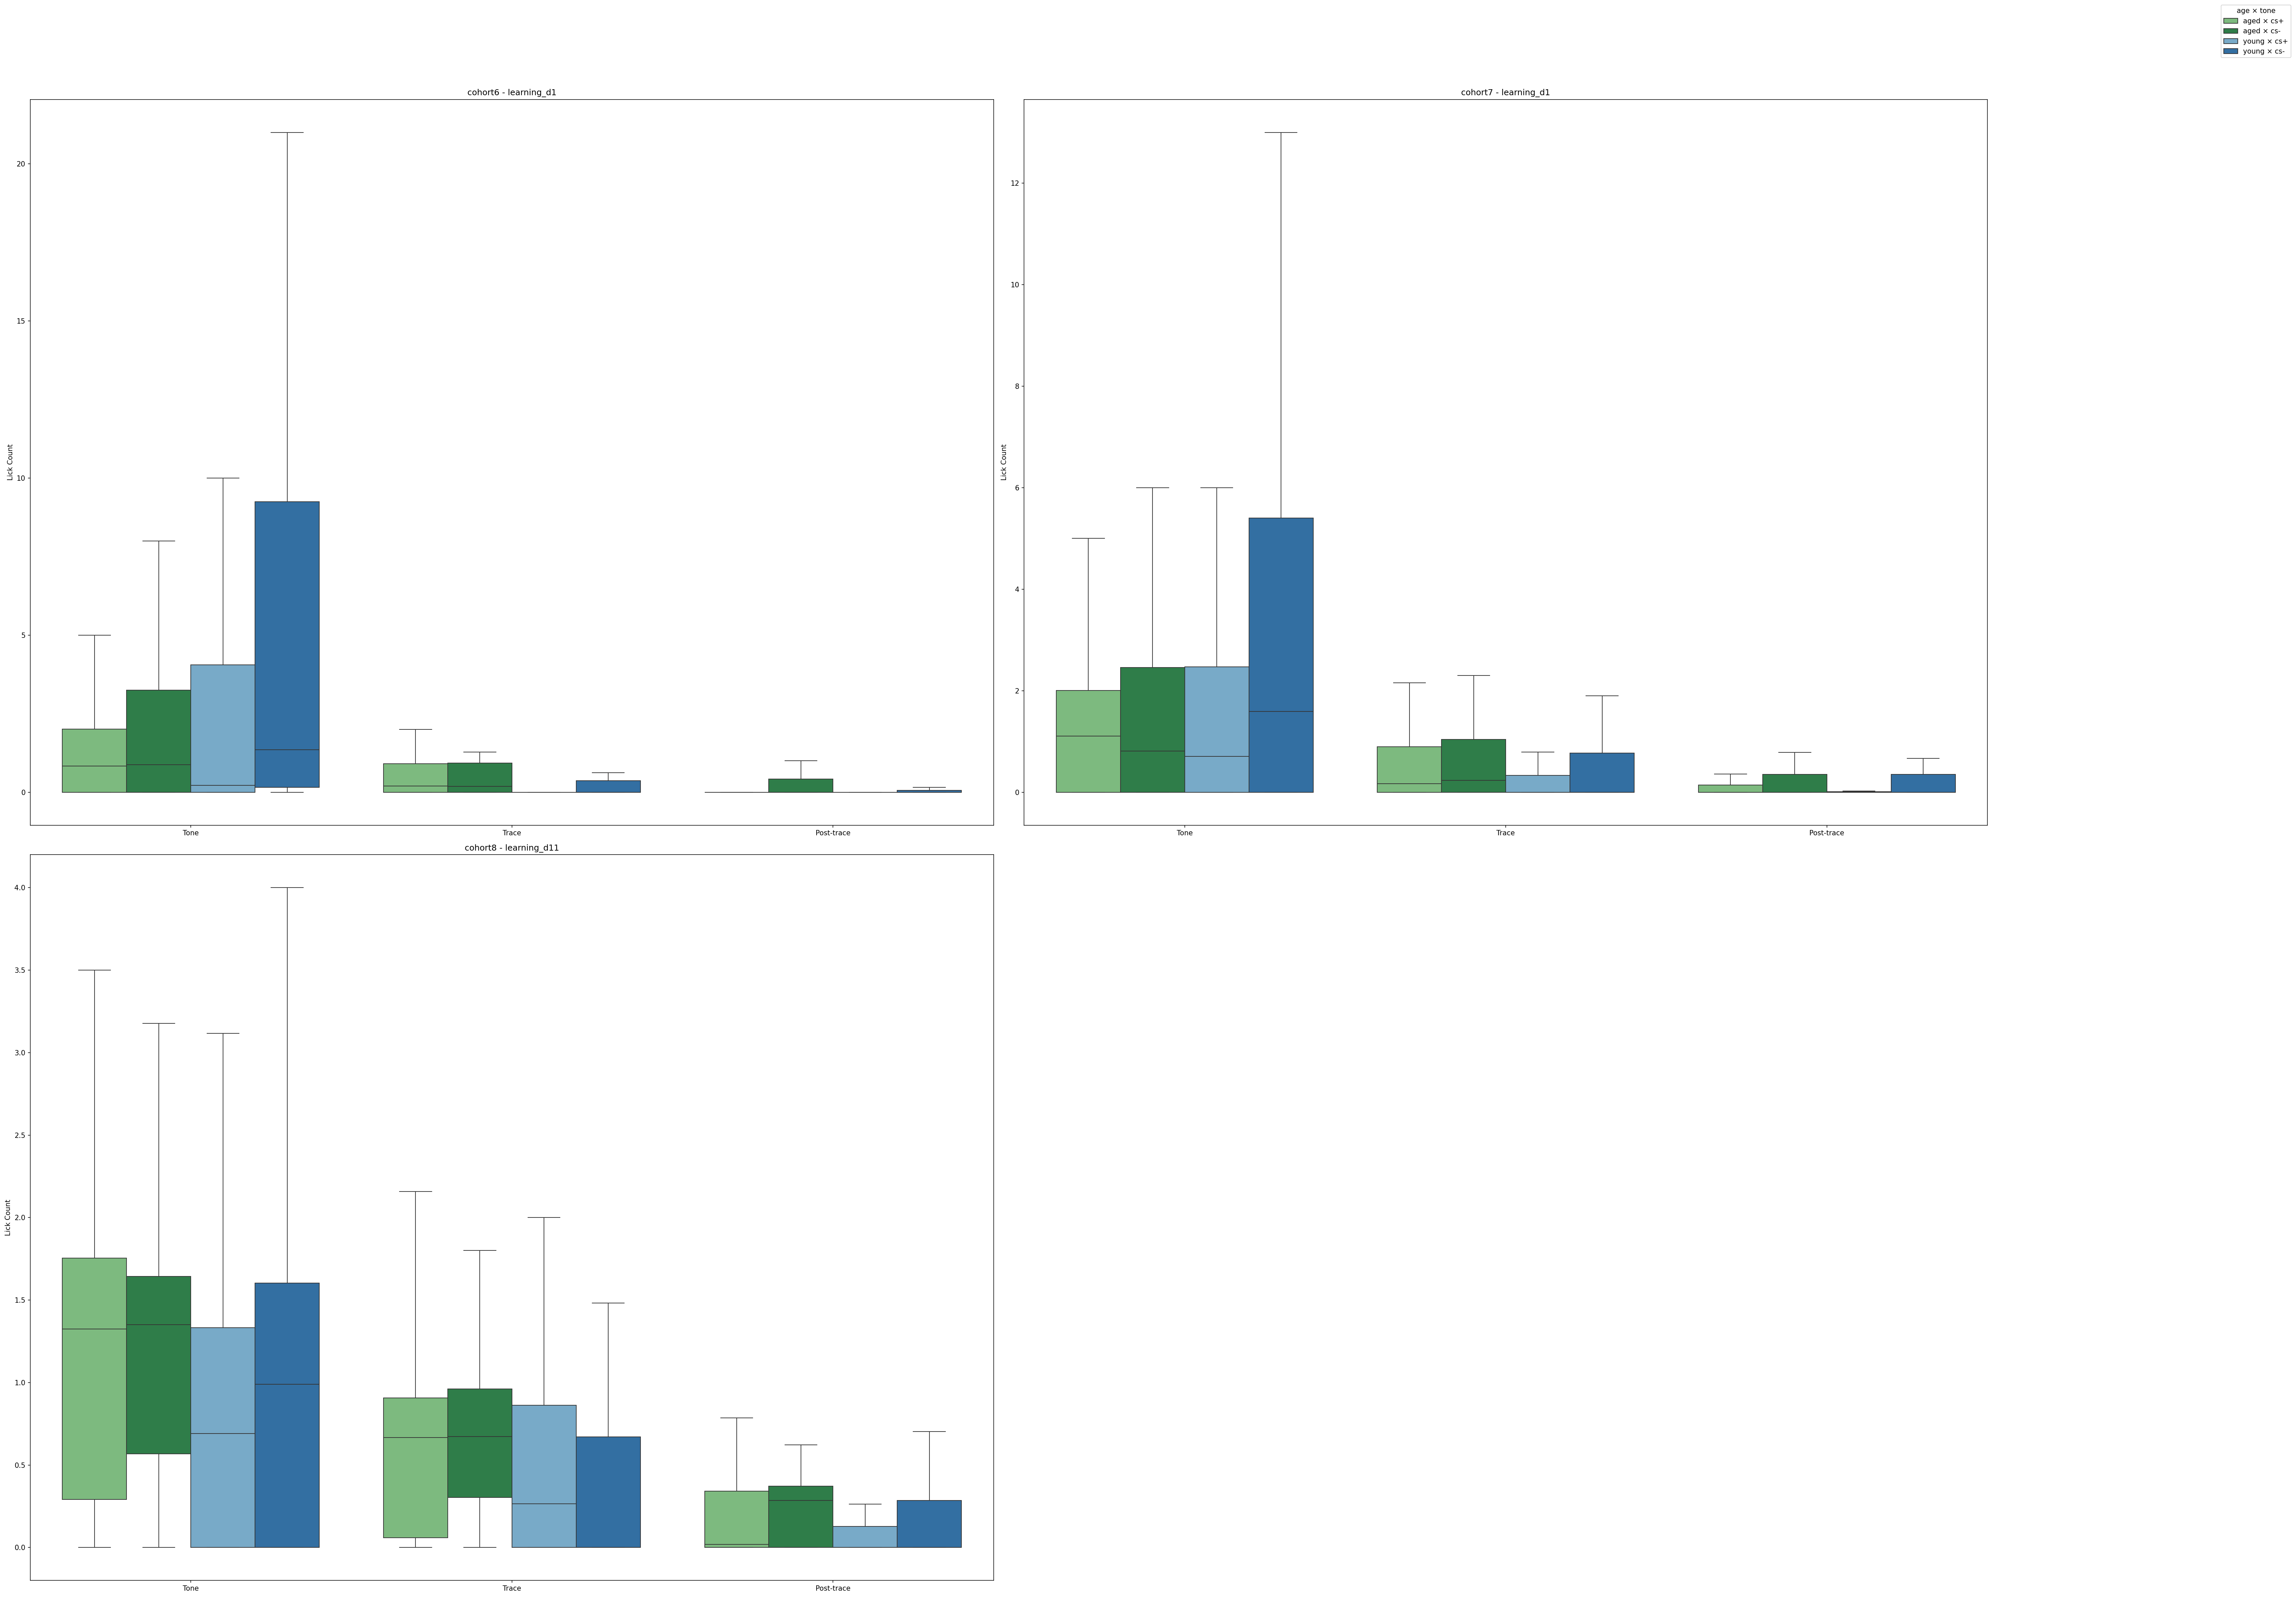

In [34]:
multiCohort.plot_stage_boxplots_by_group_per_session(
    stage_cols={
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",
        "Post-trace": "norm_post_trace_licks",
    },
    group_vars=["age", "tone"],
    figsize_per_plot=(20,16),
)

c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWar

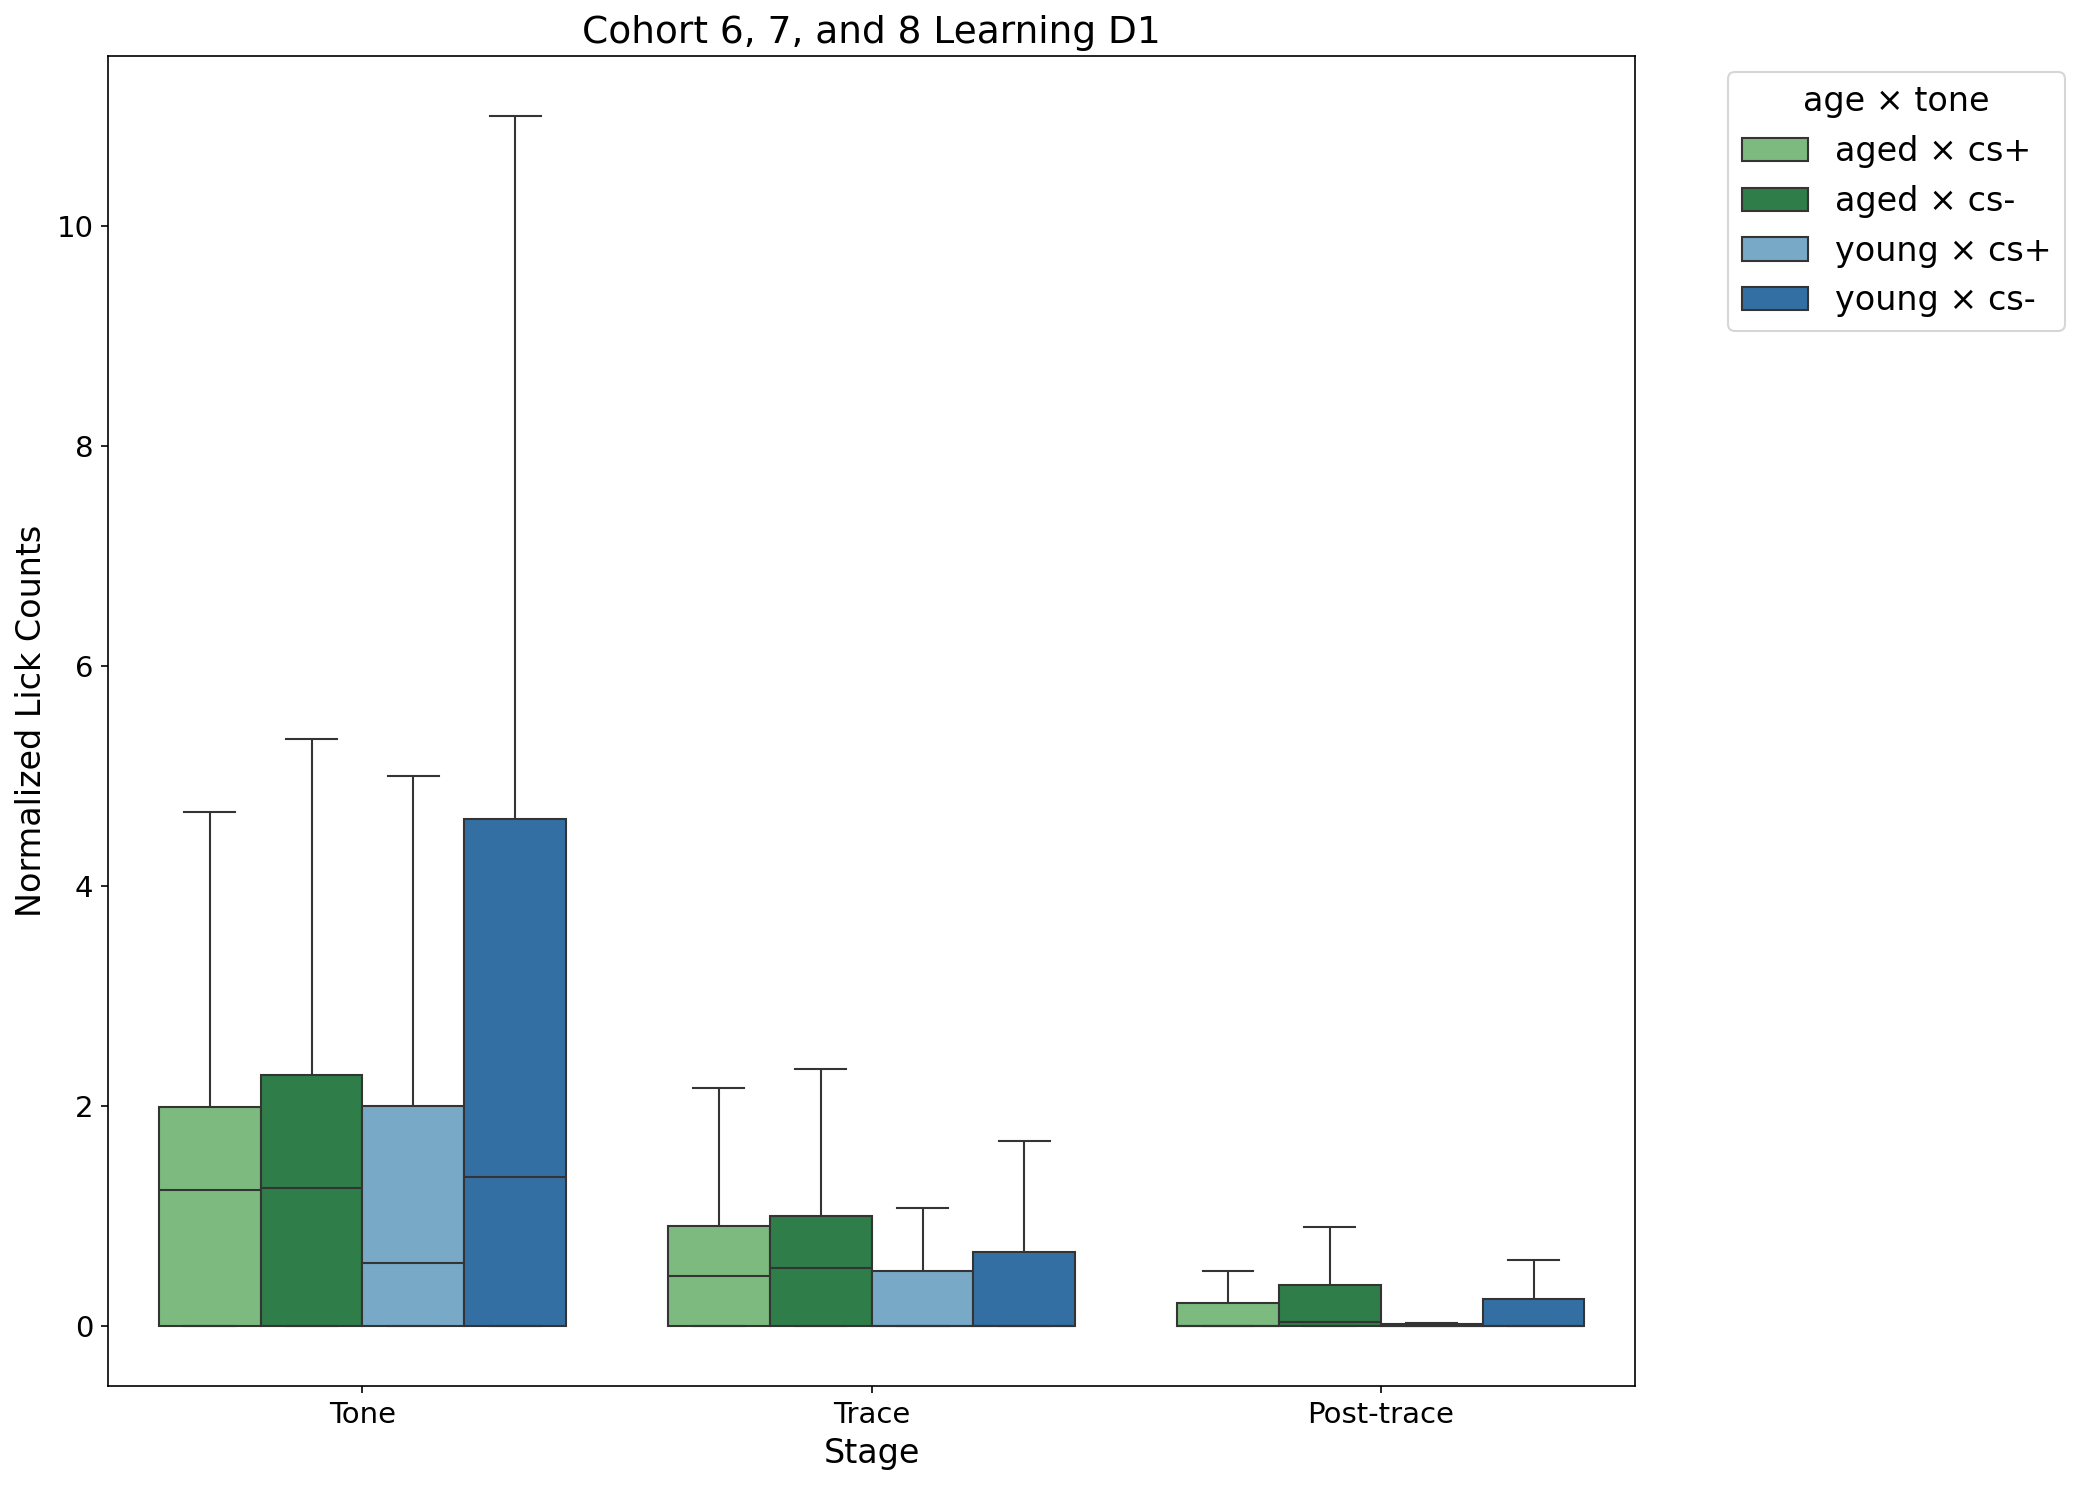

In [3]:
multiCohort.plot_stage_boxplot_by_group(
    stage_cols={
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",
        "Post-trace": "norm_post_trace_licks",
    },
    group_vars=["age", "tone"],
    title="Cohort 6, 7, and 8 Learning D1",
    figsize=(14,10),
    ylabel="Normalized Lick Counts",
)

In [ ]:
multiCohort.wilcoxon_test_for_condition(
    condition='tone',
    filter_group='age',
    select_group='aged',
    testing_metrics='norm_post_trace_licks',
)

Wilcoxon test between cs- and cs+ among aged mice:
Statistic: 5560.0, p-value: 0.00047552426437180007
